In [2]:
# import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# import the excel file for analysis
df=pd.read_excel('Dummy_Dataset.xlsx',index_col=None)

In [5]:
#check the first five rows of the datasets
df.head()

,Date,Name of Customer,Time of Order,Expected Time out,Expected Time of Delivery,Time Out Update,Why was the Order not Dispatched in 30mins?,Action Taken,New Expected Time Out,New Expected Time of Delivery,...,Boneless Beef 1kg,Goat Meat 1kg,Hake 1kg,Hake 1kg (Cleaned),Titus 1kg,Titus 1kg (Cleaned),Chicken 1kg,Cow Head & Neck 1kg,Naira Value,Fulfilment Center
0,2022-06-07 00:00:00,Mr Ojo Olukunle,17:05:00,17:35:00,18:35:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3185.0,Bashorun
1,2022-07-26 00:00:00,Mrs Adedokun,11:43:00,12:13:00,13:13:00,Gone,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2340.0,Akobo
2,2022-08-20 00:00:00,Kemi,11:49:00,12:19:00,14:19:00,Gone,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2340.0,Aleshinloye
3,2022-08-12 00:00:00,Omotayo A.,11:43:00,12:13:00,13:13:00,Gone,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2340.0,Onikolobo
4,2022-06-03 00:00:00,Osasu,14:37:00,15:07:00,17:07:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1430.0,Alakia


In [108]:
#Group the revenue generation by location
rev_by_loc=df.groupby(by=['Fulfilment Center'],as_index=False)['Naira Value'].sum().sort_values(by=['Naira Value'],ascending=False)
rev_by_loc.head(5)


,Fulfilment Center,Naira Value
3,Aleshinloye,241020.0
7,Felele,230750.0
4,Apata,197860.0
6,Bashorun,171600.0
12,UI,147030.0


In [109]:
rev_by_loc.tail()

,Fulfilment Center,Naira Value
9,Olorunsogo,39325.0
10,Omi-Adio,24505.0
5,Apete,14430.0
11,Onikolobo,10660.0
0,Abiola Way,2340.0


In [ ]:
# we can deduce that  Aleshinloye is the location that broght the highest revenue while Abiola way brought the lowest revenue

In [17]:
# estimate the mean revenue for each location
rev_by_loc=df.groupby(by=['Fulfilment Center'],as_index=False)['Naira Value'].mean().sort_values(by=['Naira Value'],ascending=False)
rev_by_loc.head(20)


,Fulfilment Center,Naira Value
3,Aleshinloye,6342.631579
7,Felele,5628.048780
4,Apata,5073.333333
8,Ologuneru,4638.636364
1,Akobo,4588.235294
6,Bashorun,4400.000000
2,Alakia,3861.000000
12,UI,3675.750000
9,Olorunsogo,3575.000000
11,Onikolobo,3553.333333


In [ ]:
# considering apete and onikolobo locations,it is observed that Apete has more revenue but Onikolobo has more revenues per unit customers.

<AxesSubplot:title={'center':'Revenue by location'}, xlabel='Fulfilment Center', ylabel='Naira Value'>

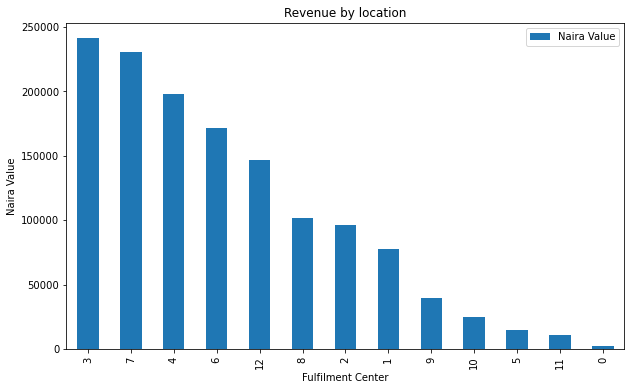

In [13]:
# visualize the  data on  a bar chart
rev_by_loc.plot(kind='bar',title='Revenue by location',ylabel='Naira Value',xlabel='Fulfilment Center',figsize=(10,6))


In [111]:
# to estimate the average delivery time per location
deltime_by_loc=df.groupby(by=['Fulfilment Center'],as_index=False)['Duration(minutes)'].mean().sort_values(by=['Duration(minutes)'],ascending=False)
deltime_by_loc.head(30)

,Fulfilment Center,Duration(minutes)
9,Olorunsogo,70.888889
3,Aleshinloye,68.500000
7,Felele,62.892857
10,Omi-Adio,61.000000
12,UI,57.321429
5,Apete,53.000000
6,Bashorun,52.933333
4,Apata,51.360000
2,Alakia,41.000000
8,Ologuneru,35.000000


In [ ]:
# we can deduce that only Akobo and Abiola Way have average delivery time of 30 minutes or less which is in line with the expected time of delivery while Onilokobo has a delay of about half a minute while other locations have a delay of five minutes or more

In [112]:
# Number of new customers gained per location
new_cust=df.groupby('Fulfilment Center')['Customer Type'].apply(lambda x:(x=='New Customer').sum()).reset_index(name='Number of New Customers').sort_values(['Number of New Customers'],ascending=False)
new_cust.head(20) 

,Fulfilment Center,Number of New Customers
1,Akobo,5
12,UI,5
6,Bashorun,4
2,Alakia,3
7,Felele,3
9,Olorunsogo,3
10,Omi-Adio,2
11,Onikolobo,2
0,Abiola Way,1
3,Aleshinloye,1


In [ ]:
# we can deduce that Akobo and UI both have the highest number of new customers gained while Ologuneru has no new customers gained recently

In [83]:
# distribution of commodities sold across different locations
# first create a dataframe that contains all the purchased commodities
col=df.filter(like='Token Pack',axis=1)
col


,Token Pack (Cow Tail),Token Pack (Cow Hump),Token Pack (Cow Head & Neck),Token Pack (Cow Leg),Token Pack (Agemawo),Token Pack (Cow Assorted),Token Pack (Pomo),Token Pack (Cow Minced Meat),Token Pack (Shaki & Roundabout),Token Pack (Goat Meat),Token Pack (Goat Assorted),Token Pack (Head & Leg),Token Pack (Chicken Gizzard),Token Pack (Chicken),Token Pack (Hake),Token Pack (Titus)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
#unpivot the multiple columns to form a singlecolumn with multiple entry
df_unpivot=df.melt(id_vars='Fulfilment Center', value_vars=col, var_name='commodities purchased', value_name='Quantity purchased', col_level=None)


In [89]:
df_unpivot

,Fulfilment Center,commodities purchased,Quantity purchased
0,Bashorun,Token Pack (Cow Tail),NaN
1,Akobo,Token Pack (Cow Tail),NaN
2,Aleshinloye,Token Pack (Cow Tail),NaN
3,Onikolobo,Token Pack (Cow Tail),NaN
4,Alakia,Token Pack (Cow Tail),NaN
...,...,...,...
4795,Akobo,Token Pack (Titus),NaN
4796,Apata,Token Pack (Titus),NaN
4797,Apata,Token Pack (Titus),NaN
4798,UI,Token Pack (Titus),NaN


In [98]:
# commodities purchased by location
com_by_loc=df_unpivot.groupby(by=['Fulfilment Center','commodities purchased'],as_index=False)['Quantity purchased'].sum().sort_values(by=['Quantity purchased'],ascending=False)
com_by_loc.head(5)

,Fulfilment Center,commodities purchased,Quantity purchased
16,Akobo,Token Pack (Agemawo),9.0
72,Apata,Token Pack (Cow Tail),7.0
18,Akobo,Token Pack (Chicken),7.0
112,Felele,Token Pack (Agemawo),7.0
64,Apata,Token Pack (Agemawo),7.0


In [100]:
com_by_loc.tail(10)

,Fulfilment Center,commodities purchased,Quantity purchased
30,Akobo,Token Pack (Shaki & Roundabout),0.0
70,Apata,Token Pack (Cow Leg),0.0
35,Alakia,Token Pack (Cow Assorted),0.0
69,Apata,Token Pack (Cow Hump),0.0
84,Apete,Token Pack (Cow Head & Neck),0.0
39,Alakia,Token Pack (Cow Minced Meat),0.0
124,Felele,Token Pack (Head & Leg),0.0
123,Felele,Token Pack (Hake),0.0
41,Alakia,Token Pack (Goat Assorted),0.0
74,Apata,Token Pack (Goat Meat),0.0


In [ ]:
#insights from the above dataframe
# Agemawo is the most bought commodity and its highest purchase is at Akobo while it has no single sale of Shaki and roundabout


In [101]:
# estimate the commodities that new customers bought the most
df1_unpivot=df.melt(id_vars='Customer Type', value_vars=col, var_name='commodities purchased', value_name='Quantity purchased', col_level=None)


In [102]:
df1_unpivot

,Customer Type,commodities purchased,Quantity purchased
0,New Customer,Token Pack (Cow Tail),NaN
1,Old Customer,Token Pack (Cow Tail),NaN
2,Old Customer,Token Pack (Cow Tail),NaN
3,Old Custome,Token Pack (Cow Tail),NaN
4,Old Customer,Token Pack (Cow Tail),NaN
...,...,...,...
4795,New Customer,Token Pack (Titus),NaN
4796,Retail,Token Pack (Titus),NaN
4797,Old Customer,Token Pack (Titus),NaN
4798,Old Customer,Token Pack (Titus),NaN


In [105]:
newc_by_loc=df1_unpivot.groupby(by=['Customer Type','commodities purchased'],as_index=False)['Quantity purchased'].sum().sort_values(by=['Quantity purchased'],ascending=False)
newc_by_loc.head(5)

,Customer Type,commodities purchased,Quantity purchased
80,Old Customer,Token Pack (Agemawo),38.0
81,Old Customer,Token Pack (Chicken Gizzard),18.0
83,Old Customer,Token Pack (Cow Assorted),13.0
95,Old Customer,Token Pack (Titus),12.0
82,Old Customer,Token Pack (Chicken),12.0


In [106]:
newc_by_loc[newc_by_loc['Customer Type']== 'New Customer']

,Customer Type,commodities purchased,Quantity purchased
32,New Customer,Token Pack (Agemawo),5.0
34,New Customer,Token Pack (Chicken),3.0
46,New Customer,Token Pack (Shaki & Roundabout),3.0
35,New Customer,Token Pack (Cow Assorted),1.0
40,New Customer,Token Pack (Cow Tail),1.0
37,New Customer,Token Pack (Cow Hump),1.0
47,New Customer,Token Pack (Titus),1.0
43,New Customer,Token Pack (Hake),1.0
33,New Customer,Token Pack (Chicken Gizzard),0.0
36,New Customer,Token Pack (Cow Head & Neck),0.0


In [ ]:
# it can be deduced that the most commodities purchased by new customers is Agemawo

In [113]:
newc_by_loc[newc_by_loc['Customer Type']== 'Old Customer'].head()

,Customer Type,commodities purchased,Quantity purchased
80,Old Customer,Token Pack (Agemawo),38.0
81,Old Customer,Token Pack (Chicken Gizzard),18.0
83,Old Customer,Token Pack (Cow Assorted),13.0
95,Old Customer,Token Pack (Titus),12.0
82,Old Customer,Token Pack (Chicken),12.0


In [114]:
newc_by_loc[newc_by_loc['Customer Type']== 'Old Customer'].tail()

,Customer Type,commodities purchased,Quantity purchased
90,Old Customer,Token Pack (Goat Meat),3.0
93,Old Customer,Token Pack (Pomo),3.0
89,Old Customer,Token Pack (Goat Assorted),2.0
92,Old Customer,Token Pack (Head & Leg),0.0
87,Old Customer,Token Pack (Cow Minced Meat),0.0


In [ ]:
# we can deduce that Agemawo is the commodity with highest purchase by old customers while cow minced and Head and Leg have the least purchase